# Busqueda por Costo

A continuacion se ejemplifica la busqueda por costo revisada en clase. Para ello se tiene un ejemplo de las ciudades del territorio Ecuatoriano y su distancia.


In [184]:
# Busqueda por costo.

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None # Importante tener el costo de recorer el nodo
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node):
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)
    

In [185]:
#Definimos una funcion para obtener el costo - CompareTo (Java)
def Compare(node):
    return node.cost

In [186]:
# Implementacion del metodo de busqueda por costo
def search_costo_solucion(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontier_nodes = [] # Nodos en busqueda o lista nodos o nodos por visitar

    init_node = Node(init_state) # Nodo inicial
    init_node.cost =0 # Agregar costo inicial
    frontier_nodes.append(init_node)
    while (not solved) and len(frontier_nodes) != 0:
        frontier_nodes = sorted(frontier_nodes, key=Compare) # Ordenar lista de nodos 
        node = frontier_nodes[0]
        visited_nodes.append(frontier_nodes.pop(0)) # Extraer nodo y a0Š9adirlo a visitados
        if node.data == solution:# Solucion encontrada
            solved = True
            return node
        else:
            node_data = node.data# Expandir nodos hijo (ciudades con conexion)
            child_list = []
            for achild in connections[node_data]: # Recorrera cada uno de los nodos hijos
                child = Node(achild)
                cost = connections[node_data][achild] # Obtener el costo del nodo
                child.cost = node.cost + cost # Agregamos el costo actual del nodo + el historial
                child_list.append(child)
                if not child.on_list(visited_nodes):
                    if child.on_list(frontier_nodes): # Si est¨¢ en la lista lo sustituimos con el nuevo valor de coste si es menor
                        for n in frontier_nodes:
                            if n.equal(child) and n.cost > child.cost:
                                frontier_nodes.remove(n)
                                frontier_nodes.append(child)
                    else:
                        frontier_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'Cuenca': {'Riobamba':190, 'Quito':280, 'Guayaquil':170},
        'Latacunga': {'Ambato':50, 'Quito':30},
        'Esmeraldas': {'Manta':80},
        'Manta': {'Guayaquil':60},
        'Quito': {'Riobamba':110, 'Latacunga':30, 'Cuenca':280, 'Guayaquil':190, 'Puyo':170},
        'Riobamba': {'Cuenca':190, 'Quito':110},
        'Ambato': {'Latacunga':50, 'Puyo':80, 'Guayaquil':230},
        'Puyo': {'Ambato':60, 'Quito':170},
        'Machala': {'Guayaquil':80},
        'Guayaquil': {'Machala':80, 'Ambato':230, 'Quito':190, 'Cuenca':170, 'Manta':60}
    }

    init_state = 'Guayaquil'
    solution = 'Puyo'
    solution_node = search_costo_solucion(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
        print("Costo total: %s" % str(solution_node.cost)) # Imprimir el costo total de llegar al nodo
    else:
        print("No hay solucion !!!!")

['Guayaquil', 'Ambato', 'Puyo']
Costo total: 310


## Practica

Implementar un algoritmo que me permita dibujar las conexiones con los costos y los resultados del grafo.

Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Policia/UPC/Funcion Judicial, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas generando un arbol jerarquico.


Realizar los calculos para obtener el factor de ramificacion, análisis del algoritmo en términos de completitud, optimalidad, complejidad temporal y complejidad espacial.


Subir el cuaderno con la resolucion

Generar un arbol de expansion del COVID-19 en el Ecuador y agregarle al metodo de costo para obtener la ruta de contagio.


******************************GRAFO******************************


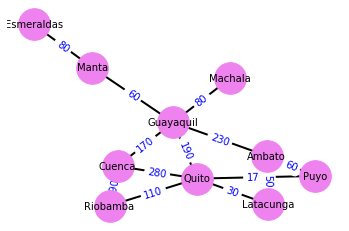

In [199]:
# Implementar
import networkx as nx
import matplotlib.pyplot as plt
print("******************************GRAFO******************************")
#Crear grafo vacio
G=nx.Graph()

#Se crean los nodos hacia sus respectivas ciudades de las cuales se extendieden
G = nx.Graph()
G.add_edge("Riobamba","Cuenca", label = '190')
G.add_edge("Quito","Cuenca", label = '280')
G.add_edge("Guayaquil","Cuenca", label = '170')
G.add_edge("Quito","Riobamba", label = '110')
G.add_edge("Cuenca","Riobamba", label = '190')
G.add_edge("Riobamba","Quito", label = '110')
G.add_edge("Guayaquil","Quito", label = '190')
G.add_edge("Cuenca","Quito", label = '280')
G.add_edge("Latacunga","Quito", label = '30')
G.add_edge("Puyo","Quito", label = '170')
G.add_edge("Machala","Guayaquil", label = '80')
G.add_edge("Ambato","Guayaquil", label = '230')
G.add_edge("Quito","Guayaquil", label = '190')
G.add_edge("Cuenca","Guayaquil", label = '170')
G.add_edge("Manta","Guayaquil", label = '60')
G.add_edge("Ambato","Latacunga", label = '50')
G.add_edge("Quito","Latacunga", label = '30')
G.add_edge("Manta","Esmeraldas", label = '80')
G.add_edge("Guayaquil","Manta", label = '60')
G.add_edge("Puyo","Ambato", label = '80')
G.add_edge("Guayaquil","Ambato", label = '230')
G.add_edge("Latacunga","Ambato", label = '50')
G.add_edge("Ambato","Puyo", label = '60')
G.add_edge("Quito","Puyo", label = '170')
G.add_edge("Guayaquil","Machala", label = '80')
##weights = [G[u][v]['weight'] for u,v in G.edges()]

#nx.draw(G, with_labels=True,node_size=2300,width=1,node_color='c')
#etiquetas = [G[u][v]['label'] for u,v in G.edges()]
pos =nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=1000,node_color='violet') 
nx.draw_networkx_edges(G, pos, with_labels=True, width=2, alpha=1, edge_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u,v):G[u][v]['label'] for u,v in
G.edges()} ,font_color='b')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif') 
plt.axis('off')
plt.show()



Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Policia/UPC/Funcion Judicial, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas generando un arbol jerarquico.

['Policia Militar', 'UPC Miraflores', 'UPC Av. Americas']
Costo total: 8.9

******************************GRAFO******************************


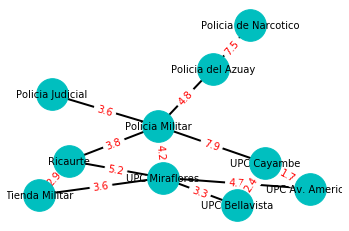

In [274]:
# Implementacion del metodo de busqueda por costo
import networkx as nx
import matplotlib.pyplot as plt

def search_costo_solucion(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontier_nodes = [] # Nodos en busqueda o lista nodos o nodos por visitar

    init_node = Node(init_state) # Nodo inicial
    init_node.cost =0 # Agregar costo inicial
    frontier_nodes.append(init_node)
    while (not solved) and len(frontier_nodes) != 0:
        frontier_nodes = sorted(frontier_nodes, key=Compare) # Ordenar lista de nodos 
        node = frontier_nodes[0]
        visited_nodes.append(frontier_nodes.pop(0)) # Extraer nodo y a0Š9adirlo a visitados
        if node.data == solution:# Solucion encontrada
            solved = True
            return node
        else:
            node_data = node.data# Expandir nodos hijo (ciudades con conexion)
            child_list = []
            for achild in connections[node_data]: # Recorrera cada uno de los nodos hijos
                child = Node(achild)
                cost = connections[node_data][achild] # Obtener el costo del nodo
                child.cost = node.cost + cost # Agregamos el costo actual del nodo + el historial
                child_list.append(child)
                if not child.on_list(visited_nodes):
                    if child.on_list(frontier_nodes): # Si est¨¢ en la lista lo sustituimos con el nuevo valor de coste si es menor
                        for n in frontier_nodes:
                            if n.equal(child) and n.cost > child.cost:
                                frontier_nodes.remove(n)
                                frontier_nodes.append(child)
                    else:
                        frontier_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'Ricaurte': {'Tienda Militar':2.9, 'UPC Miraflores':5.2, 'Policia Militar':3.8},
        'Tienda Militar': {'Ricaurte':2.9, 'UPC Miraflores':3.6},
        'UPC Miraflores': {'Tienda Militar':3.6, 'UPC Bellavista':3.3, 'Ricaurte':5.2, 'Policia Militar':4.2, 'UPC Av. Americas':4.7},
        'Policia Militar': {'Policia Judicial':3.6, 'UPC Cayambe':7.9, 'UPC Miraflores':4.2, 'Ricaurte':3.8, 'Policia del Azuay':4.8},
        'UPC Bellavista': {'UPC Cayambe':2.4, 'UPC Miraflores':3.3},
        'UPC Av. Americas': {'UPC Cayambe':1.7, 'UPC Miraflores':4.7},
        'Policia de Narcotico': {'Policia del Azuay':7.5},
        'Policia del Azuay': {'Policia Militar':4.8},        
        'UPC Cayambe': {'UPC Bellavista':2.4, 'UPC Av. Americas':1.7, 'Policia Militar':7.9},        
        'Policia Judicial': {'Policia Militar':3.6}
    }

    init_state = 'Policia Militar'
    solution = 'UPC Av. Americas'
    solution_node = search_costo_solucion(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
        print("Costo total: %s" % str(solution_node.cost)) # Imprimir el costo total de llegar al nodo
    else:
        print("No hay solucion !!!!")
        
        
print()
    
print("******************************GRAFO******************************")
#Crear grafo vacio
G=nx.Graph()

#Se crean los nodos hacia sus respectivas ciudades de las cuales se extendieden
G = nx.Graph()
G.add_edge("Tienda Militar","Ricaurte", label = '2.9')
G.add_edge("UPC Miraflores","Ricaurte", label = '5.2')
G.add_edge("Policia Militar","Ricaurte", label = '3.8')
G.add_edge("UPC Miraflores","Tienda Militar", label = '3.6')
G.add_edge("Ricaurte","Tienda Militar", label = '2.9')
G.add_edge("Tienda Militar","UPC Miraflores", label = '3.6')
G.add_edge("Policia Militar","UPC Miraflores", label = '4.2')
G.add_edge("Ricaurte","UPC Miraflores", label = '5.2')
G.add_edge("UPC Bellavista","UPC Miraflores", label = '3.3')
G.add_edge("UPC Av. Americas","UPC Miraflores", label = '4.7')
G.add_edge("Policia Judicial","Policia Militar", label = '3.6')
G.add_edge("UPC Cayambe","Policia Militar", label = '7.9')
G.add_edge("UPC Miraflores","Policia Militar", label = '4.2')
G.add_edge("Ricaurte","Policia Militar", label = '3.8')
G.add_edge("Policia del Azuay","Policia Militar", label = '4.8')
G.add_edge("UPC Cayambe","UPC Bellavista", label = '2.4')
G.add_edge("UPC Miraflores","UPC Bellavista", label = '3.3')
G.add_edge("Policia del Azuay","Policia de Narcotico", label = '7.5')
G.add_edge("Policia Militar","Policia del Azuay", label = '4.8')
G.add_edge("UPC Av. Americas","UPC Cayambe", label = '1.7')
G.add_edge("Policia Militar","UPC Cayambe", label = '7.9')
G.add_edge("UPC Bellavista","UPC Cayambe", label = '2.4')
G.add_edge("UPC Cayambe","UPC Av. Americas", label = '1.7')
G.add_edge("UPC Miraflores","UPC Av. Americas", label = '4.7')
G.add_edge("Policia Militar","Policia Judicial", label = '3.6')
##weights = [G[u][v]['weight'] for u,v in G.edges()]

#nx.draw(G, with_labels=True,node_size=2300,width=1,node_color='c')
#etiquetas = [G[u][v]['label'] for u,v in G.edges()]
pos =nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=1000,node_color='c') 
nx.draw_networkx_edges(G, pos, with_labels=True, width=2, alpha=1, edge_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u,v):G[u][v]['label'] for u,v in
G.edges()} ,font_color='r')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif') 
plt.axis('off')
plt.show()


Realizar los calculos para obtener el factor de ramificacion, análisis del algoritmo en términos de completitud, optimalidad, complejidad temporal y complejidad espacial.


Subir el cuaderno con la resolucion

Generar un arbol de expansion del COVID-19 en el Ecuador y agregarle al metodo de costo para obtener la ruta de contagio.

## Análisis del algoritmo

### Factor de Ramificación:

n=10

d=6

\begin{equation*}
Fr =
\frac{n}{d}
\end{equation*}

\begin{equation*}
Fr =
\frac{10}{6}{= 1,7}
\end{equation*}

 #### Completitud: 
*El algoritmo es completo ya que siempre encuentra a solución, para esto parte desde el estado inicial hacia su estado objetivo, buscando la ruta con menor costo.

 #### optimalidad:
*Es optimo ya que devuelve la solución con el menor costo.
  
 #### Complejidad temporal:

\begin{equation*}
O =
{b^{n}}
\end{equation*}

\begin{equation*}
O =
{(1,7)^{10}}
\end{equation*}

\begin{equation*}
O =
{=201.60}
\end{equation*}
  
 ##### Complejidad espacial
 
\begin{equation*}
O =
{b*n} 
\end{equation*}


\begin{equation*}
O =
{1,6*10}
\end{equation*}


\begin{equation*}
O =
{=16}
\end{equation*}

['Guayas', 'Pichincha', 'Quito']
Costo total: 1297

******************************GRAFO******************************


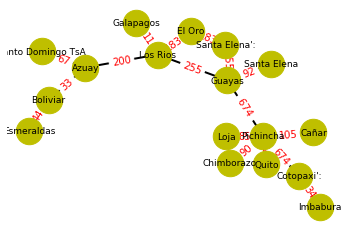

In [367]:
# Implementacion del metodo de busqueda por costo
import networkx as nx
import matplotlib.pyplot as plt

def search_costo_solucion(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontier_nodes = [] # Nodos en busqueda o lista nodos o nodos por visitar

    init_node = Node(init_state) # Nodo inicial
    init_node.cost =0 # Agregar costo inicial
    frontier_nodes.append(init_node)
    while (not solved) and len(frontier_nodes) != 0:
        frontier_nodes = sorted(frontier_nodes, key=Compare) # Ordenar lista de nodos 
        node = frontier_nodes[0]
        visited_nodes.append(frontier_nodes.pop(0)) # Extraer nodo y a0Š9adirlo a visitados
        if node.data == solution:# Solucion encontrada
            solved = True
            return node
        else:
            node_data = node.data# Expandir nodos hijo (ciudades con conexion)
            child_list = []
            for achild in connections[node_data]: # Recorrera cada uno de los nodos hijos
                child = Node(achild)
                cost = connections[node_data][achild] # Obtener el costo del nodo
                child.cost = node.cost + cost # Agregamos el costo actual del nodo + el historial
                child_list.append(child)
                if not child.on_list(visited_nodes):
                    if child.on_list(frontier_nodes): # Si est¨¢ en la lista lo sustituimos con el nuevo valor de coste si es menor
                        for n in frontier_nodes:
                            if n.equal(child) and n.cost > child.cost:
                                frontier_nodes.remove(n)
                                frontier_nodes.append(child)
                    else:
                        frontier_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'Guayas':{'Pichincha':674,'Los Rios':255, 'Santa Elena':92},
        'Los Rios':{'El Oro':183,'Azuay':200, 'Galapagos' : 11 },
        'Pichincha':{'Chimborazo':90,'Cañar':105,'Loja':85, 'Quito':623},
        'Azuay':{'Bolivar':33,'Sto.Domingo TsA':67},
        'Cotopaxi':{'Imbabura':34,'Pichincha':674},
        'Santa Elena':{'Guayas':5551,'El Oro':183},      
        'El Oro':{'Los Rios':255},
        'Galapagos':{'Los Rios' : 11 },
        'Bolivar':{'Azuay':200, 'Esmeraldas':44},
        'Esmeraldas':{'Bolivar' :44},
        'Sto.Domingo TsA':{'Bolivar':33},
        'Loja':{'Pichincha':674},
        'Chimborazo':{'Cañar':105},
        'Cañar':{'Chimborazo':90}
    }

    init_state = 'Guayas'
    solution = 'Quito'
    solution_node = search_costo_solucion(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
        print("Costo total: %s" % str(solution_node.cost)) # Imprimir el costo total de llegar al nodo
    else:
        print("No hay solucion !!!!")
        
        
print()
    
print("******************************GRAFO******************************")

G=nx.Graph()

#Se crean los nodos hacia sus respectivas ciudades de las cuales se extendieden
G = nx.Graph()
G.add_edge("Guayas", "Pichincha", label='674 ')
G.add_edge("Guayas", "Los Rios", label ='255')
G.add_edge("Los Rios", "El Oro", label ='183')
G.add_edge("Los Rios", "Galapagos", label ='11')
G.add_edge("Guayas", "Santa Elena",label ='92')
G.add_edge("Los Rios", "Azuay", label ='200')
G.add_edge("Pichincha", "Chimborazo", label ='90')
G.add_edge("Pichincha", "Quito", label ='623')
G.add_edge("Pichincha", "Cañar", label ='105')
G.add_edge("Pichincha", "Loja", label ='85')
G.add_edge("Azuay", "Boliviar", label ='33')
G.add_edge("Esmeraldas", "Boliviar", label ='44')
G.add_edge("Azuay", "Santo Domingo TsA",label ='67')
G.add_edge("Cotopaxi':", "Imbabura", label ='34')
G.add_edge("Cotopaxi':", "Pichincha", label ='674')
G.add_edge("Santa Elena':", "Guayas", label ='5551')
G.add_edge("Santa Elena':", "El Oro", label ='183')

pos =nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='y') 
nx.draw_networkx_edges(G, pos, width=2, alpha=1, edge_color='black') 
nx.draw_networkx_edge_labels(G,pos,edge_labels={(u,v):G[u][v]['label'] for u,v in G.edges()} ,font_color='red')


nx.draw_networkx_labels(G, pos,font_size=9, font_family='sans-serif') 
plt.axis('off')

plt.show()

# Conclusiones

La búsqueda por costo considera la distancia que existe entre los nodos para llegar a su estado objetivo y de esa manera encontrar la solución, está busqueda encuentra la ruta con menor coste, es decir, la ruta que tenga menor distancia para llegar a su destino. 